Hi! We have built Graph2Vec, a Python library to analyze a Graph DB using Word2Vec engine. In this notebook we will analyze some Neo4j DBs using Graph2Vec to check how it works. First of all, import package and set Bekoh standard output to notebook:


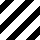
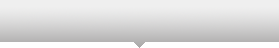
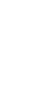
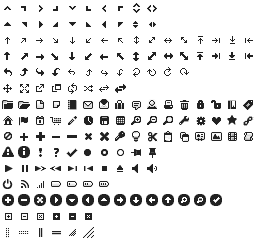
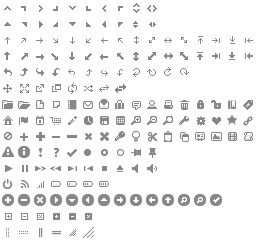
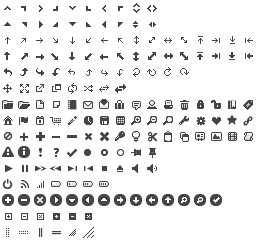
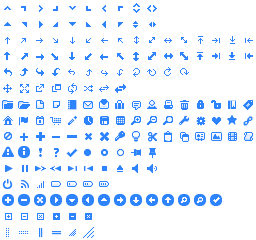
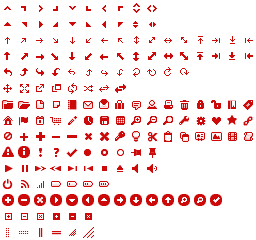
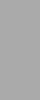
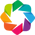
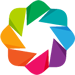
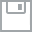
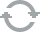
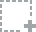
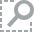
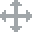
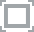
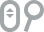

In [1]:
from node2vec import *
output_notebook()

Let's learn a small DB projection, "asterix" containing 1.945 nodes and 6.492 links. Loading a graph2vec model with 20000 (c,W) pairs, 200 dimensions, |c| = 6 and "degree method" to select "sentences".


In [4]:
asterix = node2vec("asterix",7474,"neo4j","pytpytpyt","nom",200000,2,2,"degree",[])
asterix.learn("degree",0.23)

KeyboardInterrupt: 

In [3]:
asterix.r_types

{u'APPARAIT_DANS': [{u's': u'Abraracourcix',
   u't': u'L\u2019Anniversaire_d\u2019Ast\xe9rix_et_Ob\xe9lix_-_Le_Livre_d\u2019or'},
  {u's': u'Abraracourcix', u't': u'Ast\xe9rix_et_Latraviata'},
  {u's': u'Abraracourcix', u't': u"La_Gal\xe8re_d'Ob\xe9lix"},
  {u's': u'Abraracourcix', u't': u'Le_Ciel_lui_tombe_sur_la_t\xeate'},
  {u's': u'Abraracourcix', u't': u'Ast\xe9rix_et_la_rentr\xe9e_gauloise'},
  {u's': u'Abraracourcix', u't': u"Le_Fils_d'Ast\xe9rix"},
  {u's': u'Abraracourcix', u't': u"L'Odyss\xe9e_d'Ast\xe9rix"},
  {u's': u'Abraracourcix', u't': u'La_Rose_et_le_glaive'},
  {u's': u'Abraracourcix', u't': u'Ast\xe9rix_chez_Rahazade'},
  {u's': u'Abraracourcix', u't': u'Ob\xe9lix_et_Compagnie'},
  {u's': u'Abraracourcix', u't': u'La_Grande_Travers\xe9e'},
  {u's': u'Abraracourcix', u't': u'Le_Grand_Foss\xe9'},
  {u's': u'Abraracourcix', u't': u'Ast\xe9rix_chez_les_Belges'},
  {u's': u'Abraracourcix', u't': u'Ast\xe9rix_en_Corse'},
  {u's': u'Abraracourcix', u't': u'Le_Cadeau_de_C\x

Function all_figure() show all nodes (label coloured) in a 2D projection:

In [8]:
show(all_figure(asterix))

Function nodes_figure() shows a 2D projection of mean points and standard deviation for node labels and mean angle deviation for each link label (except auto-links):

In [6]:
show(nodes_figure(asterix))

NameError: global name 'rotatePoint' is not defined

Function links_figure() shows number of links and mean angle deviation for each link label:

In [ ]:
show(links_figure(asterix))

Function angles_figure() shows angles between link labels mean vectors:

In [ ]:
show(angles_figure(asterix))

Lets load and analyze a bigger BD, "inmaterial" containing 62.546 nodes,195.934 properties and 59.667 relationships:

In [9]:
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",2000000,200,12,"degree")

In [11]:
show(inmaterial.nodes_figure())
show(inmaterial.links_figure())
show(inmaterial.angles_figure())

In node label space four main areas can be described: "Ambito Area" containing Ambito, Subambito and DetalleSubambito node labels, "Localization Area" containing Parroquia, Canton and Provincia node labels, "Lengua and Comunidad Area" and "Anexo and Herrmaienta Area". Lengua and Comunidad are semantically similar concepts but Anexo and Herramienta doesn't have to, after checking BD we realize that they are quite similar strange nodes: they only have one connection to one Inametrial node (we realize that Herramienta nodes have poor and non-sense data). In most cases, node label standard deviation is proportional to its distance to Inmaterial (Central Node Label), thus we could evaluate Node Label "Accuracy" calculating distance to Central Node Label (Inmaterial). Looking at link label distribution we can notice that ANEXO is the most "straight" link type in the graph (all links of this type has similar angle) and that Localization links mean angle are related (to show some interpretation examples).

Now, lets play with the model parameters. Starting with number of (c,W) pairs:

In [12]:
#|(c,W)| = 2500
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",2500,200,6,"degree")
show(inmaterial.nodes_figure())

In [13]:
#|(c,W)| = 20000
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",20000,200,6,"degree")
show(inmaterial.nodes_figure())

In [14]:
#|(c,W)| = 200000
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",200000,200,6,"degree")
show(inmaterial.nodes_figure())

In [15]:
#|(c,W)| = 2000000
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",2000000,200,6,"degree")
show(inmaterial.nodes_figure())

With |(c,W)| < 2500 model is not able to learn a representation, at |(c,W)| = 20.000 Lengua and Community are represented as similar concepts, at |(c,W)| = 200.000 "Localization Area" is learned and at |(c,W)| = 2.000.000 is learned "Ambito Area". Lets play with the number of dimensions in the model:

In [ ]:
#num dimensions = 2
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",2000000,2,6,"degree")
show(inmaterial.nodes_figure())

In [17]:
#num dimensions = 10
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",2000000,10,6,"degree")
show(inmaterial.nodes_figure())

In [18]:
#num dimensions = 200
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",2000000,200,6,"degree")
show(inmaterial.nodes_figure())

In [19]:
#num dimensions = 800
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",2000000,800,6,"degree")
show(inmaterial.nodes_figure())

Increasing number of dimensions from 10 to 200 provocates "Ambito Area" to separate from "Localization Area" and standard deviations to decrease, increasing from 200 to 800 dimensions produces no significative changes in the representation. Now, lets do some tests varying the context size (|c|):

In [20]:
#|c|=1
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",2000000,200,1,"degree")
show(inmaterial.nodes_figure())

In [21]:
#|c|=2
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",2000000,200,2,"degree")
show(inmaterial.nodes_figure())

In [22]:
#|c|=6
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",2000000,200,6,"degree")
show(inmaterial.nodes_figure())

In [23]:
#|c|=12
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",2000000,200,12,"degree")
show(inmaterial.nodes_figure())

In [25]:
#|c|=18
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",2000000,200,18,"degree")
show(inmaterial.nodes_figure())

With |c| = 1, everything "appears closer" and "areas" are not defined, with |c| = 2 distances back to "normal" and "areas definition" and with |c| = 12 all node labels from each "area" keep similar distance with Inmaterial. By last, we can modify the way Graph2Vec transforms Graphs in (c,W) pairs:

In [26]:
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",2000000,200,6,"normal")
show(inmaterial.nodes_figure())

In [27]:
inmaterial = graph2vec("inmaterial",7474,"neo4j","pytpytpyt","Descripcion",2000000,200,6,"degree")
show(inmaterial.nodes_figure())

Although representation is similar for "Normal" and "Degree" (c,W) pair generation, standard deviation for all node labels decreese in the case of "Degree" mode. More (c,W) pair generation modes need to be implemented in order to check if different graph projections show new interpretation possiblities!